# MVP - Draft do módulo 2 - Machine learning & Analytics

**Nome:** Marcia Valeria de Souza da Silva

**Matrícula:** 40530010055_20250_01

**Dataset:** Churn operadora

#1 Descrição
####Churn é um termo utilizado em empresas operadoras de telecomunicações que trata sobre a condição na qual um cliente deixa de utilizar os serviços desta empresa.







#2 Objetivo
#### Identificar preventivamente quais clientes têm maior probabilidade de cancelar o  serviço,  permitindo assim que a empresa possa tomar decisões para manter o cliente.

O dataset utilizado possui informações sobre os serviços a serem contratados na empresa, sobre tipos de pagamentos do cliente e variável churn.

# 3 Atributos
####Foram coletados os dados do dataset  https://www.kaggle.com/datasets/blastchar/telco-customer-churn com informações dos serviços prestados de uma operdora a aproximadamente 7040 clientes.


### 3.1 Descrição dos Atributos
1.	**CustomerID** - ID do cliente
2.	**Gender** - male / female
3.	**Senior Citizen** - se o cliente é idoso ou não
4.	**Partner** - se o cliente tem um parceiro ou não
5.	**Dependents** - se o cliente tem dependentes
6.	**Tenure** - Número de meses que o cliente permaneceu na empresa
7.	**Phone Service** - se o cliente tem serviço de telefone
8.	**Multiple Lines** - se o cliente tem múltiplas linhas
9.	**Internet Service** se o cliente tem Serviço de Internet
10.	**Online Security** - se o cliente tem serviço de segurança na internet
11.	**Online Backup** - se o cliente tem serviço de backup online
12.	**Device Protection** - Se o cliente tem proteção do dispositivo
13.	**Tech Support** - Se o cliente tem suporte tecnico
14.	**Streaming TV** - Se o cliente tem Streaming de TV
15.	**Streaming Movies** - Se o cliente tem Streaming de filmes
16.	**Contract** - O prazo do contrato do cliente (mês a mês, um ano, dois anos)
17.	**Paperless Billing** - Se o cliente tem faturamento
18.	**Payment Method** - Método de pagamento do cliente (cheque eletrônico, cheque enviado pelo correio, transferência bancária (automática), cartão de crédito
19.	**Monthly Charges** - O valor cobrado mensalmente ao cliente
20.	**Total Charges** - O valor total cobrado do cliente
21.	**Churn** - se o cliente saiu ou não dos serviços




# 4 Premissas e Hipóteses do Problema
###Prever se o cliente vai sair ou não da operadora.

#### Clientes com contratos de curto prazo (Monthly Charges) pode ter maior propensão a cancelar em comparação com contratos de longo prazo.

####Valores mensais elevados (MonthlyCharges) podem estar associados a maior insatisfação e, portanto, a maior Churn.

####Clientes idosos (SeniorCitizen) podem ser menos propensos a mudar de serviço devido à menor familiaridade com alternativas.

####A falta de serviços adicionais (como suporte técnico, backup online, segurança) pode aumentar a probabilidade de cancelamento.

####Formas de pagamento automáticas (como cartão de crédito ou débito automático) podem indicar maior fidelidade e menor Churn.


## 4.1 Tipo de Tarefa

###Cenário com classificação supervisionada. Considerando os atributos disponibilizados prever se o cliente poderá praticar churn.

##4.2 Restrições e Condições

####Atributos como PhoneService e InternetService indicam que alguns clientes podem ter apenas um tipo de serviço, o que pode influenciar no padrão de Churn.
####O dataset apresenta ser um extrato completo de uma base de clientes ativos e inativos.

####Não adotado restrições explícitas na seleção de dados.

#5 Biblioteca e carga dos dados

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms # para tratamento de missings
# Transformações Numéricas
from sklearn.preprocessing import StandardScaler #padronização
from sklearn.preprocessing import MinMaxScaler # normalização
# Transformações Categóricas
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding
from sklearn.preprocessing import LabelEncoder # Label Encoder
#Testes e classificações
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.dummy import DummyClassifier


url_dados = 'https://raw.githubusercontent.com/MarciaValeria2110/MVP_Machine_Learning_-_Analytics/refs/heads/main/clientes_Churn.csv'

labels_atributos = ['CustomerID','Gender','SeniorCitizen','Partner','Dependents','Tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']

servicos = pd.read_csv(url_dados, names=labels_atributos, skiprows=1, delimiter=',')

# Drop CustomerID column as it is not needed for modeling
servicos = servicos.drop('CustomerID', axis=1)

In [ ]:
# @title
# Versão da matplotlib utilizada
mpl.__version__

'3.10.0'

In [ ]:
# @title
# para ignorar warning
import warnings
warnings.filterwarnings("ignore")

## 5.1 Dataframe
####Dataframe utilizando a biblioteca pandas.

In [ ]:
# @title
# Informação do Dataframe
type(servicos)

pandas.core.frame.DataFrame

# 6 Análise de Dados
### Na Análise Exploratória sobre o dataset foi analisado as características das variáveis que influenciam a prática do churn.

## 6.1 Tipo de Instâncias
### o dasaset possui 7044 instâncias com atributos numéricos e categóricos.

In [ ]:
# @title
print(f"Total de instâncias: {len(servicos)}")
print("\nTipos de dados por coluna:")
print(servicos.info())

Total de instâncias: 7043

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   o

In [ ]:
# atualizando o Dtype dos atributos
servicos = pd.read_csv('https://raw.githubusercontent.com/MarciaValeria2110/MVP_Machine_Learning_-_Analytics/refs/heads/main/clientes_Churn.csv')

# Drop CustomerID column as it is not needed for modeling
servicos = servicos.drop('CustomerID', axis=1)

# Converter 'TotalCharges' para float64 (tratando possíveis erros com coerção)
servicos['TotalCharges'] = pd.to_numeric(servicos['TotalCharges'], errors='coerce')

# Convert 'SeniorCitizen' back to int64 or float64 for modeling
servicos['SeniorCitizen'] = servicos['SeniorCitizen'].astype(int)

# Verificar os tipos atualizados
print(servicos.dtypes)

Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


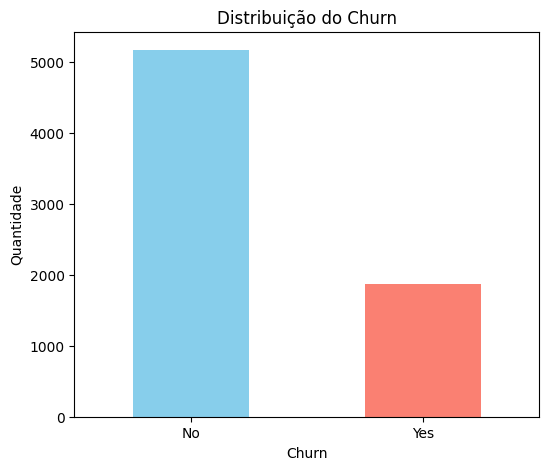

In [ ]:
# Gráfico com distribuição do churn
plt.figure(figsize=(6, 5))
servicos['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribuição do Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

#7 Estátisticas Descritivas
 Nesta estátistica veremos as dimensões do dataset, informações de colunas e linhas.

In [ ]:
# @title
# Mostra as 6 primeiras linhas do dataset com as informações dos seus atributos
servicos.head(6)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [ ]:
# Contagem dos serviço utilizando as práticas de POO
from abc import ABC, abstractmethod
from typing import List, Dict, Any


In [ ]:
class DataAnalyzer(ABC):
    """Classe abstrata para análise de dados"""

    def __init__(self, data: pd.DataFrame):
        self.data = data

    @abstractmethod
    def analyze(self):
        pass

    @abstractmethod
    def visualize(self):
        pass

class ServicesAnalyzer(DataAnalyzer):
    """Analisador específico para dados de serviços"""
    def __init__(self, data: pd.DataFrame, custom_columns: List[str] = None):
        super().__init__(data)
        self.services_columns = custom_columns or [
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies'
        ]
        self.analysis_results = {}

    def analyze(self) -> Dict[str, Any]:
        """Realiza análise estatística das colunas de serviços"""
        print("=== ANÁLISE DE SERVIÇOS ===")

        for col in self.services_columns:
            if col in self.data.columns:
                value_counts = self.data[col].value_counts()
                self.analysis_results[col] = value_counts

                print(f"\n{col}:")
                print(value_counts)
                print("-" * 30)
            else:
                print(f"⚠️ Coluna '{col}' não encontrada no dataset")

        return self.analysis_results

    def visualize(self, figsize: tuple = (15, 12)) -> None:
        """Cria visualização dos dados analisados"""
        if not self.analysis_results:
            print("⚠️ Execute analyze() antes de visualizar")
            return

        plt.style.use('default')
        fig, axes = plt.subplots(3, 3, figsize=figsize)
        axes = axes.flatten()

        services_to_plot = self.services_columns[:9]

        for i, col in enumerate(services_to_plot):
            if col in self.analysis_results:
                counts = self.analysis_results[col]
                axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
                axes[i].set_title(f'Distribuição de {col}')
            else:
                axes[i].text(0.5, 0.5, f'Dados de {col}\nnão disponíveis',
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f'{col} - Dados Ausentes')

        plt.tight_layout()
        plt.show()

    def get_summary(self) -> Dict[str, int]:
        """Retorna resumo estatístico"""
        summary = {}
        for col, counts in self.analysis_results.items():
            summary[col] = {
                'total_observations': counts.sum(),
                'unique_categories': len(counts),
                'most_frequent': counts.index[0],
                'most_frequent_count': counts.iloc[0]
            }
        return summary

In [ ]:
def get_summary(self) -> Dict[str, int]:
        """Retorna resumo estatístico"""
        summary = {}
        for col, counts in self.analysis_results.items():
            summary[col] = {
                'total_observations': counts.sum(),
                'unique_categories': len(counts),
                'most_frequent': counts.index[0],
                'most_frequent_count': counts.iloc[0]
            }
        return summary

class AnalysisFactory:
    """Factory para criar diferentes tipos de analisadores"""

    @staticmethod
    def create_services_analyzer(data: pd.DataFrame,
                               custom_columns: List[str] = None) -> ServicesAnalyzer:
        """Cria um analisador de serviços"""
        return ServicesAnalyzer(data, custom_columns)

=== ANÁLISE DE SERVIÇOS ===

PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------------------------------

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
------------------------------

TechSupport:
TechSupport
No   

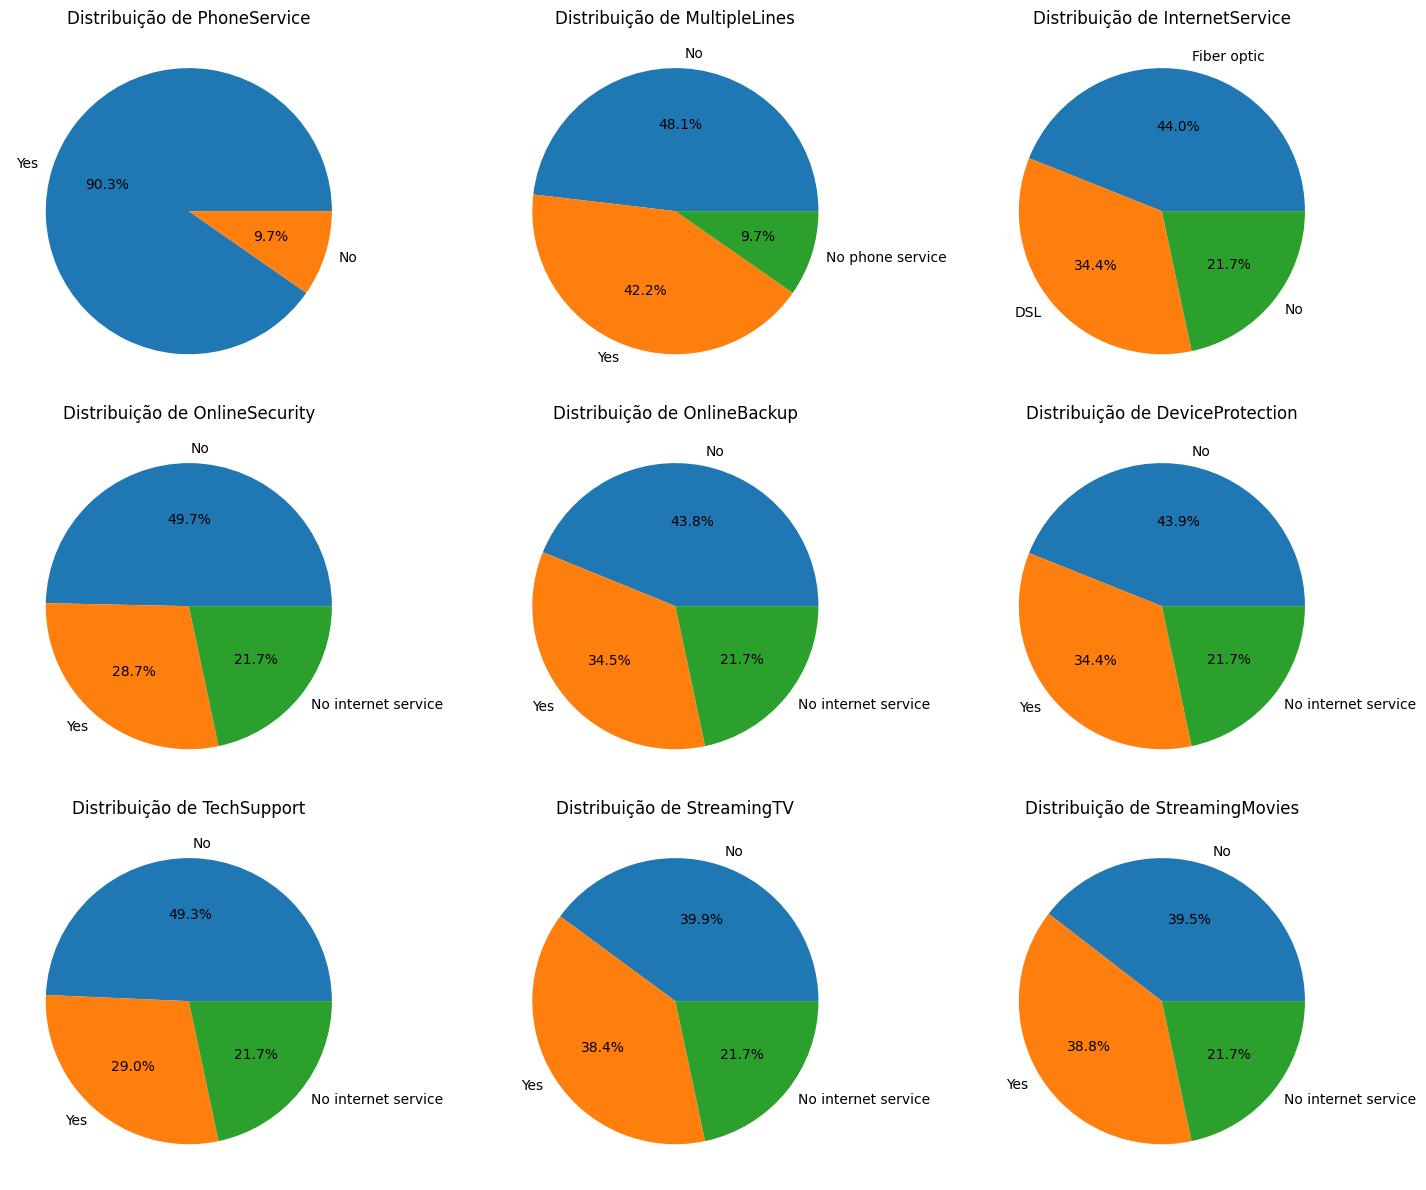


=== RESUMO ESTATÍSTICO ===

PhoneService:
  Total de observações: 7043
  Categorias únicas: 2
  Mais frequente: Yes (6361)

MultipleLines:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: No (3390)

InternetService:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: Fiber optic (3096)

OnlineSecurity:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: No (3498)

OnlineBackup:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: No (3088)

DeviceProtection:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: No (3095)

TechSupport:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: No (3473)

StreamingTV:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: No (2810)

StreamingMovies:
  Total de observações: 7043
  Categorias únicas: 3
  Mais frequente: No (2785)


In [ ]:
def main():
    # Supondo que 'servicos' seja seu DataFrame
    # servicos = pd.read_csv('url_dados')


 # Criando o analisador usando Factory
    analyzer = AnalysisFactory.create_services_analyzer(servicos)

    # Realizando análise
    results = analyzer.analyze()

# Gerando visualização
    analyzer.visualize()

    # Obtendo resumo
    summary = analyzer.get_summary()
    print("\n=== RESUMO ESTATÍSTICO ===")
    for service, stats in summary.items():
        print(f"\n{service}:")
        print(f"  Total de observações: {stats['total_observations']}")
        print(f"  Categorias únicas: {stats['unique_categories']}")
        print(f"  Mais frequente: {stats['most_frequent']} ({stats['most_frequent_count']})")


if __name__ == "__main__":
    main()

In [ ]:
# Contagem de cada serviço individualmente
services_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in services_columns:
    print(f"\n{col}:")
    print(servicos[col].value_counts())
    print("-" * 30)


PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
------------------------------

MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
------------------------------

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
------------------------------

OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
------------------------------

OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------

DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
------------------------------

TechSupport:
TechSupport
No                     3473
Yes  

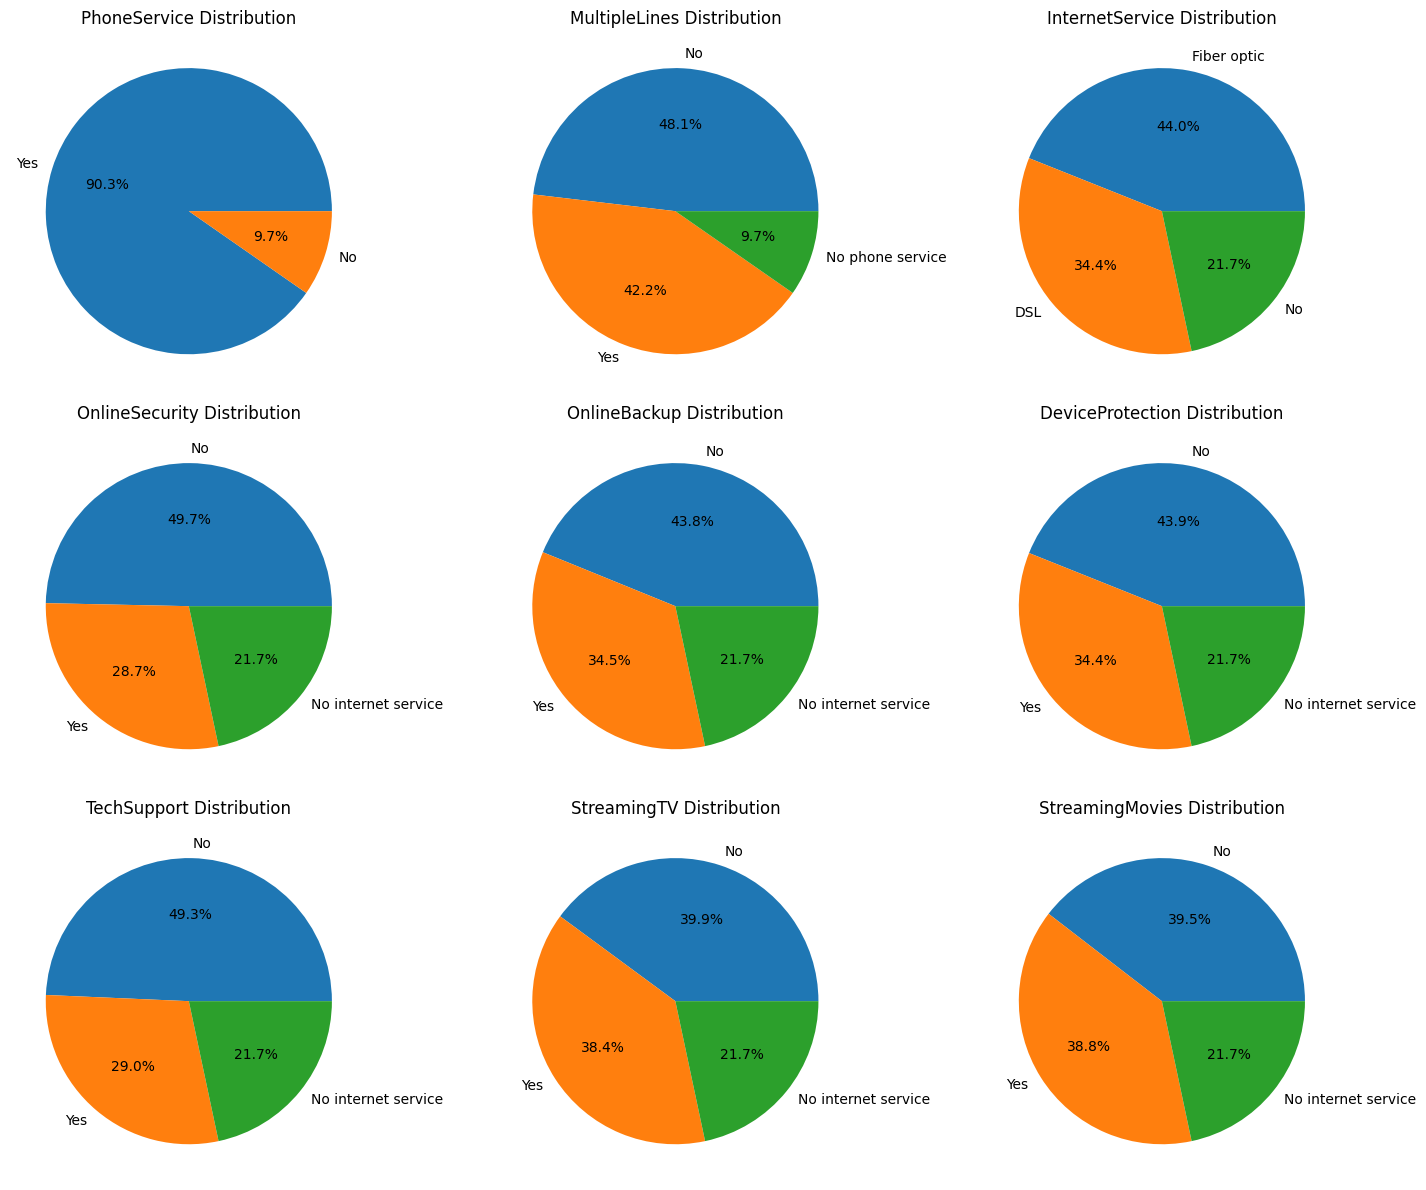

In [ ]:
# Gráfico para visualização da distribuição dos serviços
plt.style.use('default')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

services_to_plot = services_columns[:9]

for i, col in enumerate(services_to_plot):
    counts = servicos[col].value_counts()
    axes[i].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

#ver se mantém este heatmap

#8 Limpeza- TRATAMENTO DE MISSIG

In [ ]:
servicos.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
servicos.isnull().sum()


,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# exibindo as dimensões do dataset
print(servicos.shape)

(7043, 20)


In [ ]:
# eliminando linhas que tenham ALGUM valor missing
servicos.dropna(how='any', inplace=True)

In [ ]:
print(servicos.shape)

(7032, 20)


In [ ]:
servicos.isnull().sum()

,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


#textualizar

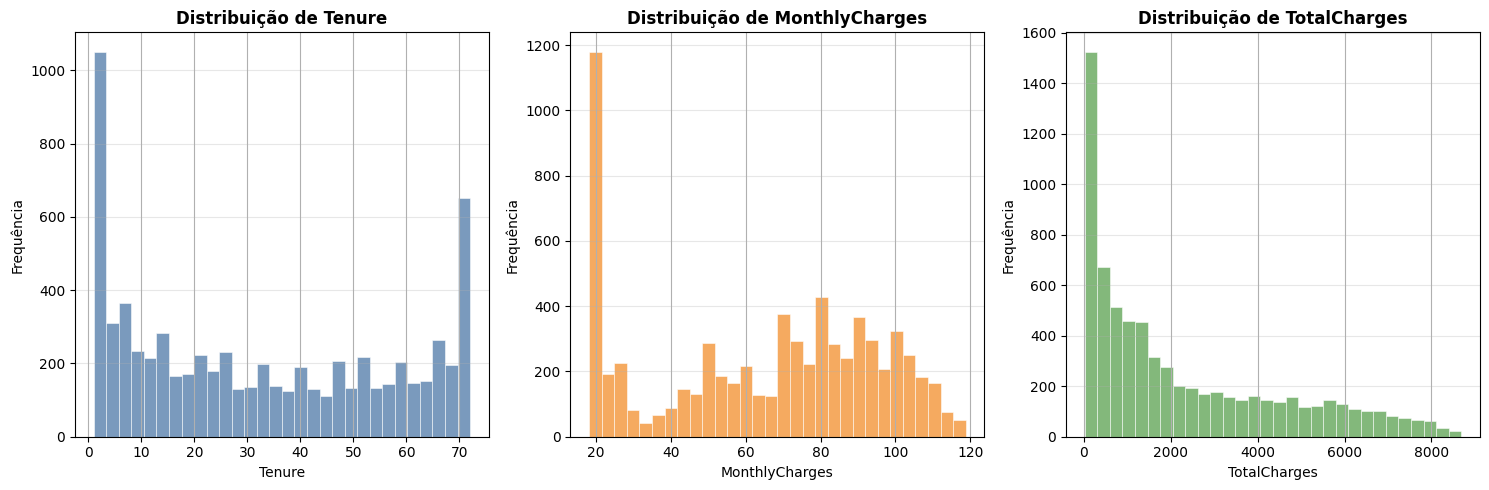

In [ ]:
# Gáfico de variáveis numéricas
numeric_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
servicos_num = servicos[numeric_cols].copy()
servicos_num['TotalCharges'] = pd.to_numeric(servicos_num['TotalCharges'], errors='coerce')

colors = ['#4e79a7', '#f28e2b', '#59a14f']

plt.figure(figsize=(15, 5))
# Plot only the first 3 numeric columns to fit the 1x3 subplot layout
for i, col in enumerate(numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    servicos_num[col].hist(bins=30, color=colors[i-1], alpha=0.75,
                          edgecolor='white', linewidth=0.5)

    plt.title(f'Distribuição de {col}', fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

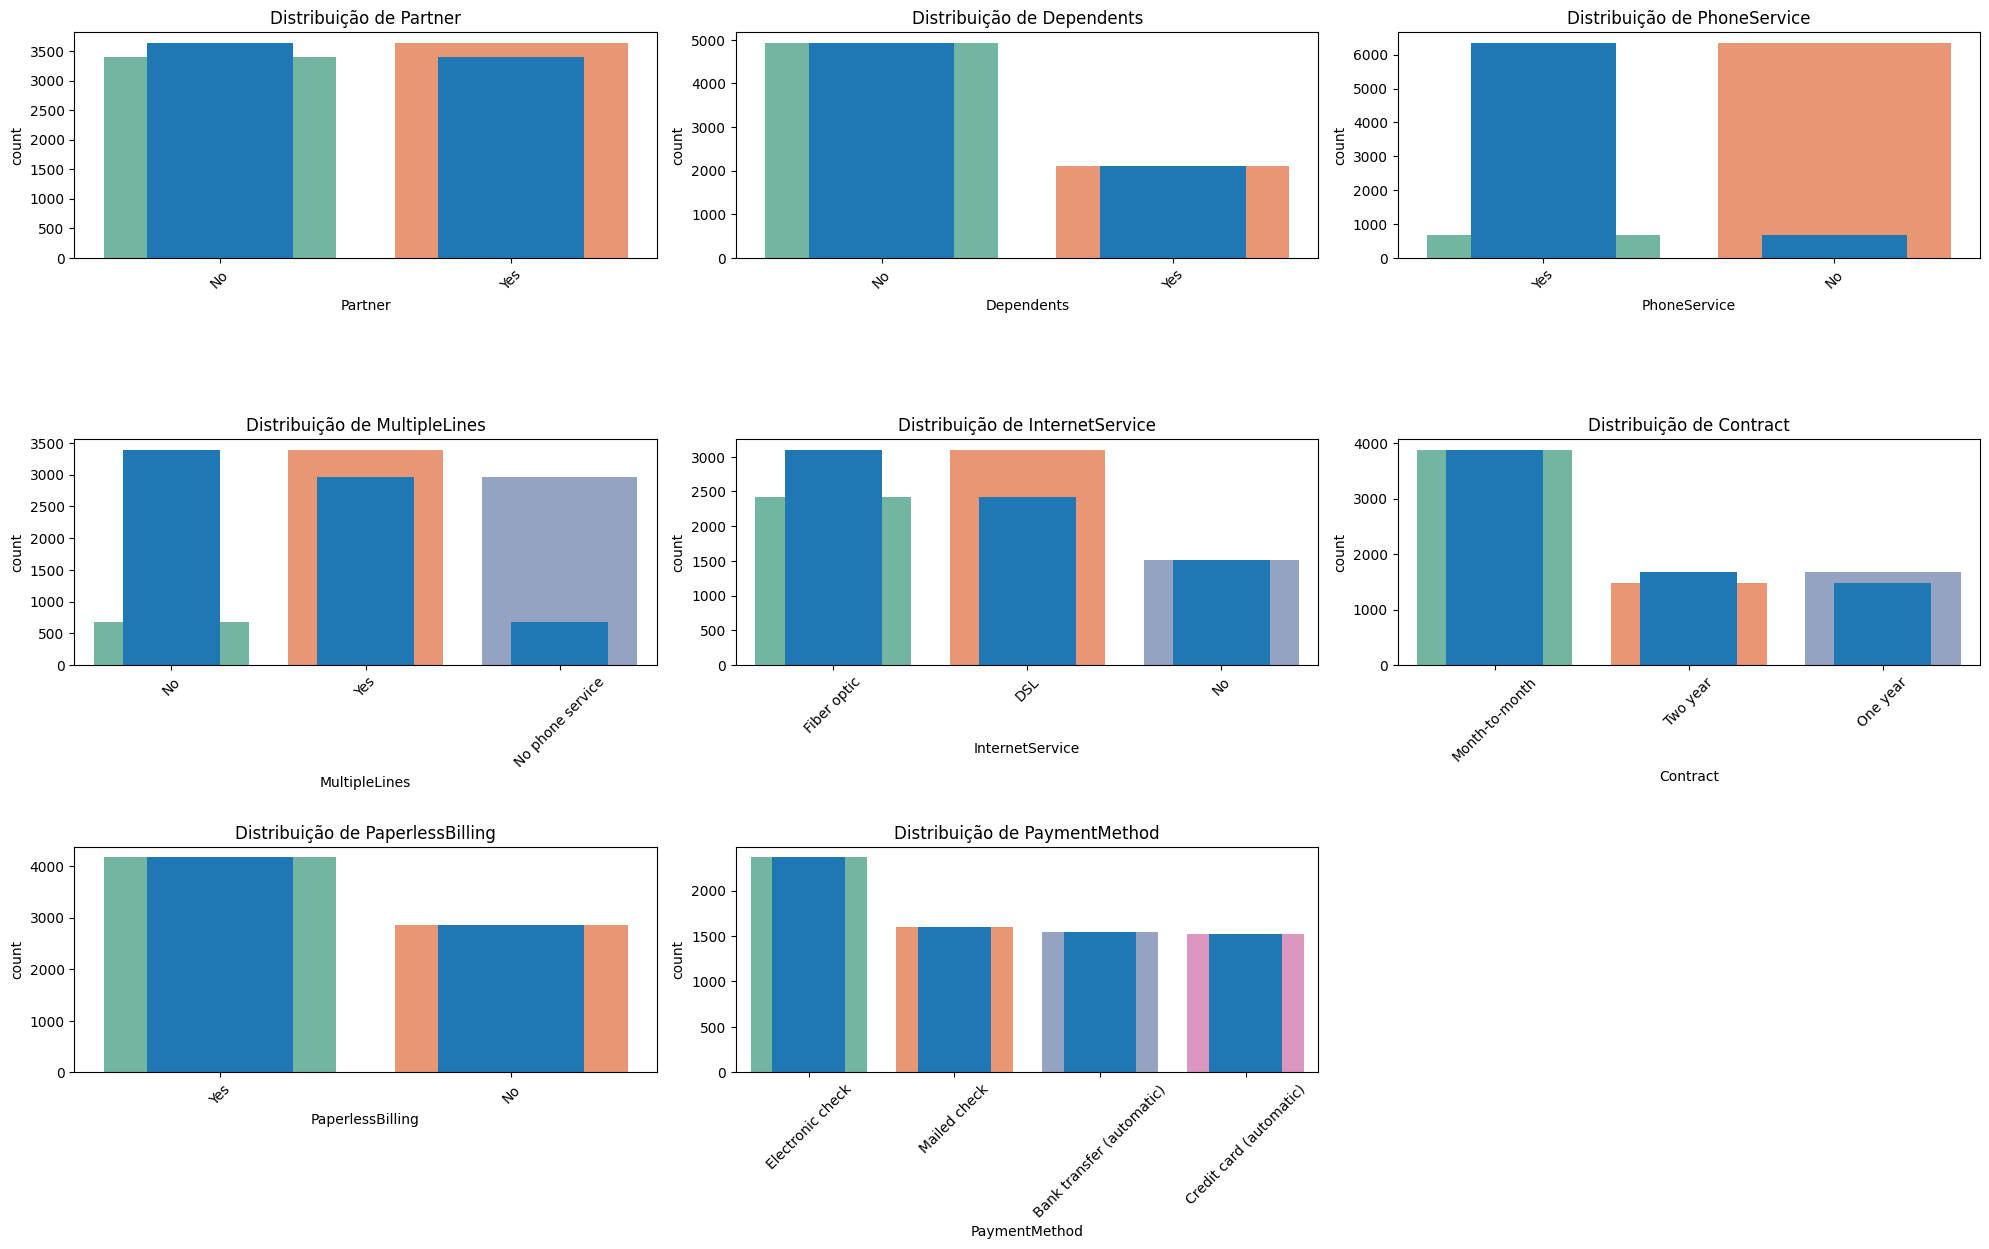

In [ ]:
# Gáfico de variáveis categóricas
categorical_cols = ['Partner', 'Dependents',
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=servicos, x=col, palette='Set2')
    servicos[col].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#9 Preparação dos dados

In [ ]:

#x remove a coluna churn do dataframe e y mantém a variável target para previsão
X = servicos.drop('Churn', axis=1) # attributes
y = servicos['Churn'] # churn

#Preparando as colunas categóricas e numéricas para os futuros tratamentos
# Identifica as colunas categóricas e numéricas para os futuros tratamentos
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=np.number).columns

# Aplicando one-hot encoding para as variáveis categóricas em colunas binárias
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Matem as colunas numéricas e as transformadas categóricas em númericas
X_numeric_and_encoded = pd.concat([X[numerical_cols], X_encoded], axis=1)

#9.1 Treino , Teste e Validação

###Feito a divisão considerando 80% para treino e 20% para teste com o objetivo de futuramente treinar um modelo de machine learnig e poder realizar previsões nos testes, usando as métricas pertinentes como por exemplo de Acurácia.

###Testes realizados utilizando a biblioteca sklearn.model_selection train_test

In [ ]:
# Divisão em conjuntos de treino(80%) e teste(20%)
# Now split the preprocessed X and the target y
X_train, X_test, y_train, y_test = train_test_split(X_numeric_and_encoded, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
print("\nResultadoPré-processamento")
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_teste: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")


ResultadoPré-processamento
Dimensões de X_train: (5625, 34)
Dimensões de X_teste: (1407, 34)
Dimensões de y_train: (5625,)
Dimensões de y_test: (1407,)


##Metricas de avaliação
#### Avaliando para identificar as métricas que apresentam o melhor desempenho

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Fazer previsões
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para a classe positiva


Text(0.5, 500.7222222222223, 'Previsão')

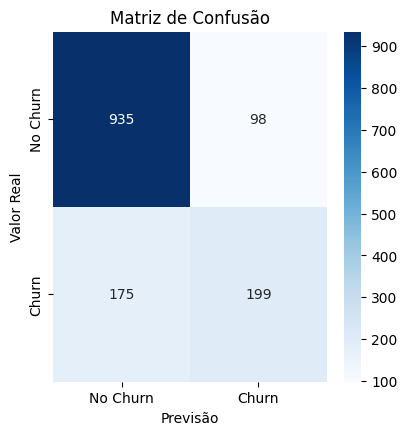

In [ ]:
# Matriz de confusão
plt.figure(figsize=(15, 10))

# Subplot 1: Matriz de Confusão
plt.subplot(2, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusão')
plt.ylabel('Valor Real')
plt.xlabel('Previsão')

# detalhamento do desempenho do modelo, mostrando, para cada classe, o número
# de classificações:
# verdadeiro negativo(VN) = 935
# falso positivo (FP)= 98
# falso negativo (FN) = 175
# verdadeiro positivo (VP)= 199

#Considerando a Acurácia temos 80% (VP + VN) / (VP + VN + FP + FN)
# Recall baixo de 53% (VP / (VP + FN))
# Precisão de 67% (VP / (VP + FP))


In [ ]:
# Relatório de Classificação do modelo para as métricas(Precisão, Recall)
# No Churn: Clientes que não cancelaram o serviço
# Churn: Clientes que cancelaram o serviço
# macro avg: Média simples entre as classes

# Plot das métricas
metrics = ['precision', 'recall']
classes = ['No Churn', 'Churn', 'macro avg']
x = np.arange(len(classes))
width = 0.25



###

###Relatório de Classificação por Classe e Métrica
####Gráfico de métricas de precisão e recall

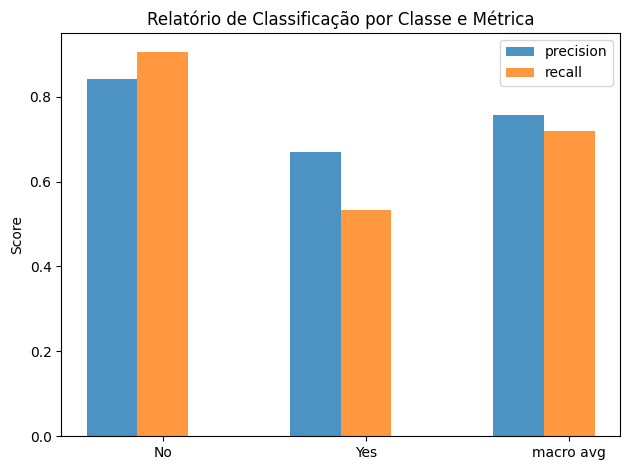

In [ ]:
# Relatório de Classificação do modelo para as métricas(Precisão, Recall)
# No Churn: Clientes que não cancelaram o serviço
# Churn: Clientes que cancelaram o serviço
# macro avg: Média simples entre as classes

# Plot das métricas
metrics = ['precision', 'recall']
classes = ['No Churn', 'Churn', 'macro avg']
x = np.arange(len(classes))
width = 0.25

# Generate the classification report and store it in report_servicos
report_servicos = classification_report(y_test, y_pred, output_dict=True)

for i, metric in enumerate(metrics):
    values = [report_servicos[cls][metric] for cls in ['No', 'Yes']] + [report_servicos['macro avg'][metric]] # Access metrics correctly
    plt.bar(x + i*width, values, width, label=metric, alpha=0.8)

plt.ylabel('Score')
plt.title('Relatório de Classificação por Classe e Métrica')
plt.xticks(x + width, ['No', 'Yes', 'macro avg']) # Correct xticks labels
plt.legend()
plt.tight_layout()

###Curva ROC

####Gráfico indicando o desempenho do modelo de AUC = 84% sendo considerado uma boa performance.

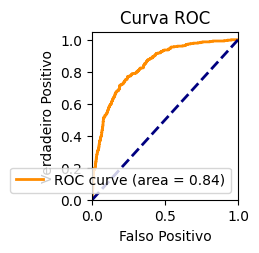

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Curva ROC
plt.subplot(2, 3, 3)

# Encode the target variable for the test set
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

####O Gráfico informando o valor de AUC = 0.659, considerado um desempenho moderado

(0.0, 1.05)

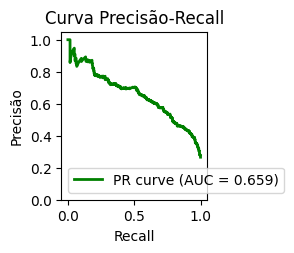

In [ ]:
# Curva precisão/recall
plt.subplot(2, 3, 4)
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão-Recall')
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])


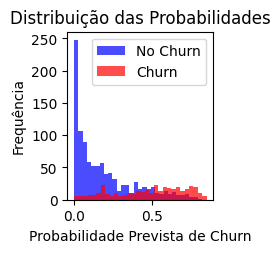

In [ ]:
# 6. DISTRIBUIÇÃO DAS PROBABILIDADES
plt.subplot(2, 3, 5)
plt.hist(y_pred_proba[y_test_encoded == 0], bins=30, alpha=0.7, label='No Churn', color='blue')
plt.hist(y_pred_proba[y_test_encoded == 1], bins=30, alpha=0.7, label='Churn', color='red')
plt.xlabel('Probabilidade Prevista de Churn')
plt.ylabel('Frequência')
plt.title('Distribuição das Probabilidades')
plt.legend()

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

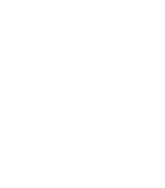

In [ ]:
# 7. SCORE GERAL DO MODELO
plt.subplot(2, 3, 6)
plt.axis('off')

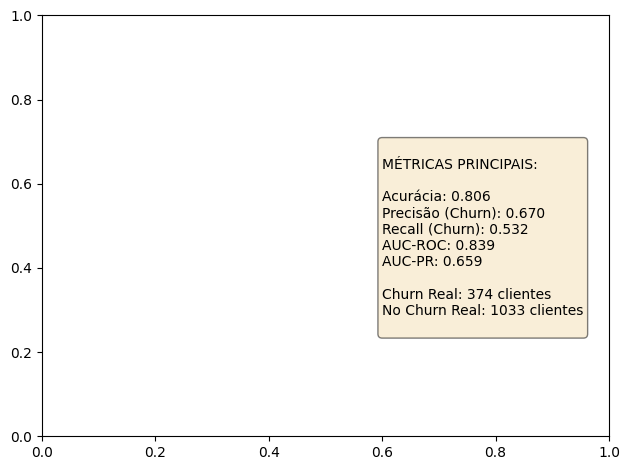

In [ ]:
# Calcular métricas principais
# Encode y_pred
y_pred_encoded = label_encoder.transform(y_pred)

accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
precision_pos = report_servicos['Yes']['precision']  # Precisão para Churn
recall_pos = report_servicos['Yes']['recall']        # Recall para Churn

metrics_text = f"""
MÉTRICAS PRINCIPAIS:

Acurácia: {accuracy:.3f}
Precisão (Churn): {precision_pos:.3f}
Recall (Churn): {recall_pos:.3f}
AUC-ROC: {roc_auc:.3f}
AUC-PR: {pr_auc:.3f}

Churn Real: {sum(y_test_encoded == 1)} clientes
No Churn Real: {sum(y_test_encoded == 0)} clientes
"""

plt.text(0.6, 0.7, metrics_text, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# baseline - modelo 2
📈 O que os Baselines mostram:
Most Frequent: Sempre prever a classe mais comum

Stratified: Prever aleatoriamente mantendo a distribuição das classes

Uniform: Prever aleatoriamente com igual probabilidade

Regras simples: Baseadas em conhecimento do domínio

# balanceamento
O que Esperar:
Melhoria no Recall: O modelo deverá detectar melhor a classe minoritária

Possível redução na Precision: Pode aumentar falsos positivos

AUC PR: Espera-se uma melhoria em relação aos 0.659 anteriores

Execute o código e me mostre o novo resultado do AUC! Vamos ver quanto conseguimos melhorar.

In [ ]:
# Versão rápida para teste
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to y_test
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)


# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_encoded)


# Treinar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Avaliar
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_proba)
pr_auc = auc(recall, precision)

print(f"AUC com SMOTE: {pr_auc:.3f}")

AUC com SMOTE: 0.588


###Baseline - modelo 1

###Utilizado a estratégia DummyClassifier ...

###atualizarxxxx    O DummyClassifier é uma ferramenta fundamental no kit de um cientista de dados para avaliação de modelos de Machine Learning.

#O que é o DummyClassifier?
#Em português, seria algo como "Classificador Ingênuo" ou "Classificador de Referência". Ele é um modelo de classificação muito simples que faz previsões usando regras básicas e sem aprender nenhum padrão real dos dados.

#A utilidade principal do DummyClassifier é servir como benchmark (ponto de referência).

#Analogia: Imagine que você está construindo um carro de Fórmula 1. Para saber se ele é bom, você não o compara com uma bicicleta. Você o compara com o carro do ano anterior ou com o carro de um concorrente direto. O DummyClassifier é esse "carro básico" contra o qual você compara seu "carro de Fórmula 1" (seu modelo complexo).

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
#BASELINES SIMPLES (Estratégias de Referência)
def create_baseline_models(X_train, y_train, X_test, y_test):
    """
    Cria modelos baseline simples para comparação
    """
    baselines = {}

In [ ]:
    # Verificar distribuição das classes
    class_distribution = Counter(y_train)
    majority_class = max(class_distribution, key=class_distribution.get)
    majority_ratio = class_distribution[majority_class] / len(y_train)

In [ ]:
print("="*60)
print("ANÁLISE DA DISTRIBUIÇÃO DAS CLASSES")
print("="*60)
print(f"Total de instâncias: {len(y_train)}")
print(f"Classe majoritária: '{majority_class}' - {class_distribution[majority_class]} instâncias ({majority_ratio:.1%})")
print(f"Classe minoritária: {[(k, v) for k, v in class_distribution.items() if k != majority_class]}")
print()

ANÁLISE DA DISTRIBUIÇÃO DAS CLASSES
Total de instâncias: 5625
Classe majoritária: 'No' - 4130 instâncias (73.4%)
Classe minoritária: [('Yes', 1495)]



In [ ]:
    # Estratégias do DummyClassifier
    strategies = [
        ('Most Frequent', 'most_frequent'),
        ('Stratified', 'stratified'),
        ('Uniform Random', 'uniform'),
        ('Constant (Churn=Yes)', 'constant', {'constant': 'Yes'})
    ]

    baseline_results = []


    for strategy in strategies:
        if strategy[1] == 'constant':
            dummy = DummyClassifier(strategy=strategy[1], constant=strategy[2]['constant'])
            model_name = strategy[0]
        else:
            dummy = DummyClassifier(strategy=strategy[1])
            model_name = strategy[0]



# Treinar e prever
        dummy.fit(X_train, y_train)
        y_pred = dummy.predict(X_test)

        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)

In [ ]:
        print(f"\n=== {model_name} ===")
        print(f"Acurácia: {accuracy:.4f}")
        print("\nMatriz de Confusão:")
        print(confusion_matrix(y_test, y_pred))
        print("\nRelatório de Classificação:")
        print(classification_report(y_test, y_pred))

        baseline_results.append({
            'Model': model_name,
            'Accuracy': accuracy,
        })


=== Constant (Churn=Yes) ===
Acurácia: 0.2658

Matriz de Confusão:
[[   0 1033]
 [   0  374]]

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00      1033
         Yes       0.27      1.00      0.42       374

    accuracy                           0.27      1407
   macro avg       0.13      0.50      0.21      1407
weighted avg       0.07      0.27      0.11      1407



### Balanceamento

##9.2 Validação cruzada
### Faz sentido utilizar também um método de validação cruzada, pelo motivo de que a divisão dos treino 80/20 realizada pode ter variações que venham a camuflar o desempenho real do modelo.

###Neste caso está sendo realizado em 10 folds para depois ser utilizados nos modelos com os  algoritimos KNN, Árvore de Classificação, Naive Bayes e SVM, e podendo assim fazer uma comparação entre todos esses resultados.



In [ ]:
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

#Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.

#Hiperparametros
####Modelagem

####Treinando os modelos com os algoritmo KNN, Árvore deClassificação, Naive Bayes e SVM, para classificação e resultado médio da acurácia.

KNN: 0.765156 (0.009469)
CART: 0.722663 (0.019712)
NB: 0.683727 (0.017191)
SVM: 0.734224 (0.013391)


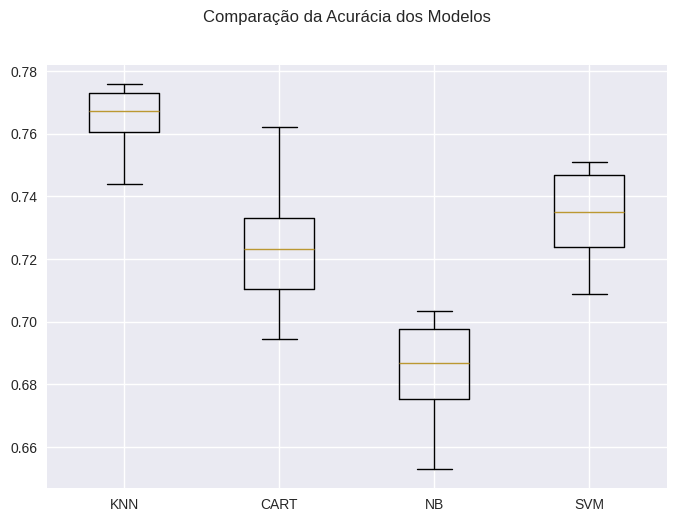

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

####Considerando a acurácia média do modelo treinado KNN  que apresentou os melhores resultados (76% de acurácia média e desvio-padrão de 2.2%).

####Construindo  um novo modelo, treinado com toda a base de treino.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.668088130774698


####O treinamento com o modelo Gaussiani teve uma acurácia de 66,8%. Valor este que pode ser melhor com treinos em outros modelos.

In [ ]:
# Separação em bases de treino e teste (holdout)
# array = servicos.values
#X = X_numeric_and_encoded # attributes
#y = servicos['Churn'] # churn

In [ ]:

# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X_numeric_and_encoded, y)

# Reduz X para os atributos selecionados
features = fit.transform(X_numeric_and_encoded)


# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", servicos.columns[0:19])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
#com 3 casas decimais
print("\nScores dos Atributos Originais:")
scores_formatados = [f"{score:.3f}" for score in fit.scores_]
print(scores_formatados)

print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=X_numeric_and_encoded.columns))


Número original de atributos: 19

Número reduzido de atributos: 4

Atributos Originais: Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Scores dos Atributos Originais:
['163.012', '1007.509', '271.577', '291.345', '163.012', '1007.509', '271.577', '291.345', '0.513', '161.776', '192.189', '0.961', '0.961', '11.285', '733.952', '383.982', '383.982', '212.445', '383.982', '47.949', '383.982', '30.937', '383.982', '196.052', '383.982', '28.240', '383.982', '26.135', '230.628', '703.210', '267.488', '129.884', '702.709', '58.406']

Atributos Selecionados: ['Tenure' 'Tenure' 'InternetService_Fiber optic' 'Contract_Two year']


In [ ]:
# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X_numeric_and_encoded, y)

# Print dos resultados
print("Atributos Originais:", servicos.columns[0:19])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados : %s" % fit.support_)
print("\nRanking dos Atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)

print("\nAtributos Selecionados :")
print(X_numeric_and_encoded.columns[fit.support_])

Atributos Originais: Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

Atributos Selecionados : [False False False False False False False False False False False False
 False False  True False False False False False False False False False
  True False False False  True  True False False False False]

Ranking dos Atributos: [20 24 28 31 18 22 26 30 23 29 10  9 19 21  1 16 15  2  6  7 12 25 11  5
  1 14  4 17  1  1  8 13  3 27]

Qtd de melhores Atributos: 4

Atributos Selecionados :
Index(['InternetService_Fiber optic', 'StreamingTV_No internet service',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')



Importância dos Atributos:


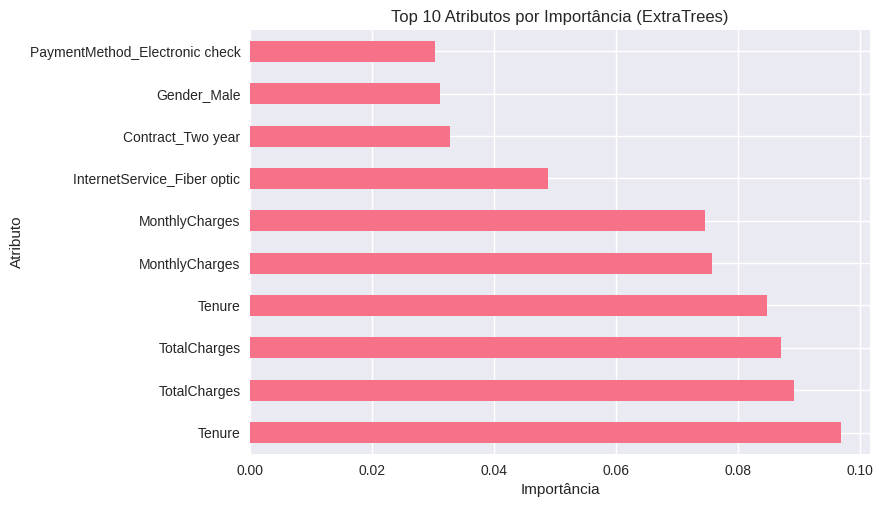


Pontuação de importância para cada atributo:
[0.0119916  0.08466144 0.07456751 0.08909011 0.01266954 0.09678676
 0.07574479 0.08703144 0.03113361 0.02633505 0.02120383 0.00383875
 0.00404607 0.02041777 0.04879514 0.00466516 0.00584707 0.02492042
 0.00384327 0.0235107  0.00313217 0.02104079 0.00531727 0.0243842
 0.00623681 0.01793659 0.00681587 0.01851229 0.02651376 0.03281437
 0.02690462 0.01529536 0.03035483 0.01364102]


In [ ]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100, random_state=7) # Added random_state for reproducibility
modelo.fit(X_numeric_and_encoded, y)

# Exibe os atributos orginais
# Print the feature importances along with the corresponding feature names
print("\nImportância dos Atributos:")
feature_importances = pd.Series(modelo.feature_importances_, index=X_numeric_and_encoded.columns)
feature_importances.nlargest(10).plot(kind='barh') # Plot top 10 features
plt.title('Top 10 Atributos por Importância (ExtraTrees)')
plt.xlabel('Importância')
plt.ylabel('Atributo')
plt.show()

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print("\nPontuação de importância para cada atributo:")
print(modelo.feature_importances_)

#Recursos avançados

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 9 # semente aleatória

# Separação em conjuntos de treino e teste
# array = servicos.values
X = X_numeric_and_encoded # Use the one-hot encoded features
y = servicos['Churn'] # Use the target variable from the original dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

###Feature Selection
•	Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.
comente

In [ ]:
np.random.seed(9) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [ ]:
# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

###Ensembles
### Voting
### Utilizando o ensemble do tipo Voting para combinar as predições dos modelos Logistic Regression, Arvore de decisão e SVM.

In [ ]:
# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

#Modelos de Ensemble
###Criando 6 tipos de Ensemles para a aplicação dos algoritimo nos modelos. Esses algoritimos visam uma melhor escolha na decisão do modelo a ser utilizado na predição.

In [ ]:
# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

In [ ]:
# Listas para armazenar os resultados
results = []
names = []

In [ ]:
# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.806222 (0.009378)
KNN: 0.766582 (0.010822)
CART: 0.729598 (0.015644)
NB: 0.678941 (0.014239)
SVM: 0.734223 (0.000653)
Bagging: 0.786135 (0.012669)
RF: 0.795735 (0.009909)
ET: 0.783470 (0.010022)
Ada: 0.803732 (0.007762)
GB: 0.802309 (0.008773)
Voting: 0.788800 (0.009411)


Avaliação dos modelos:

Tendo como melhor resultado LR 80%, Ada e GB foram bem próximos de LR.

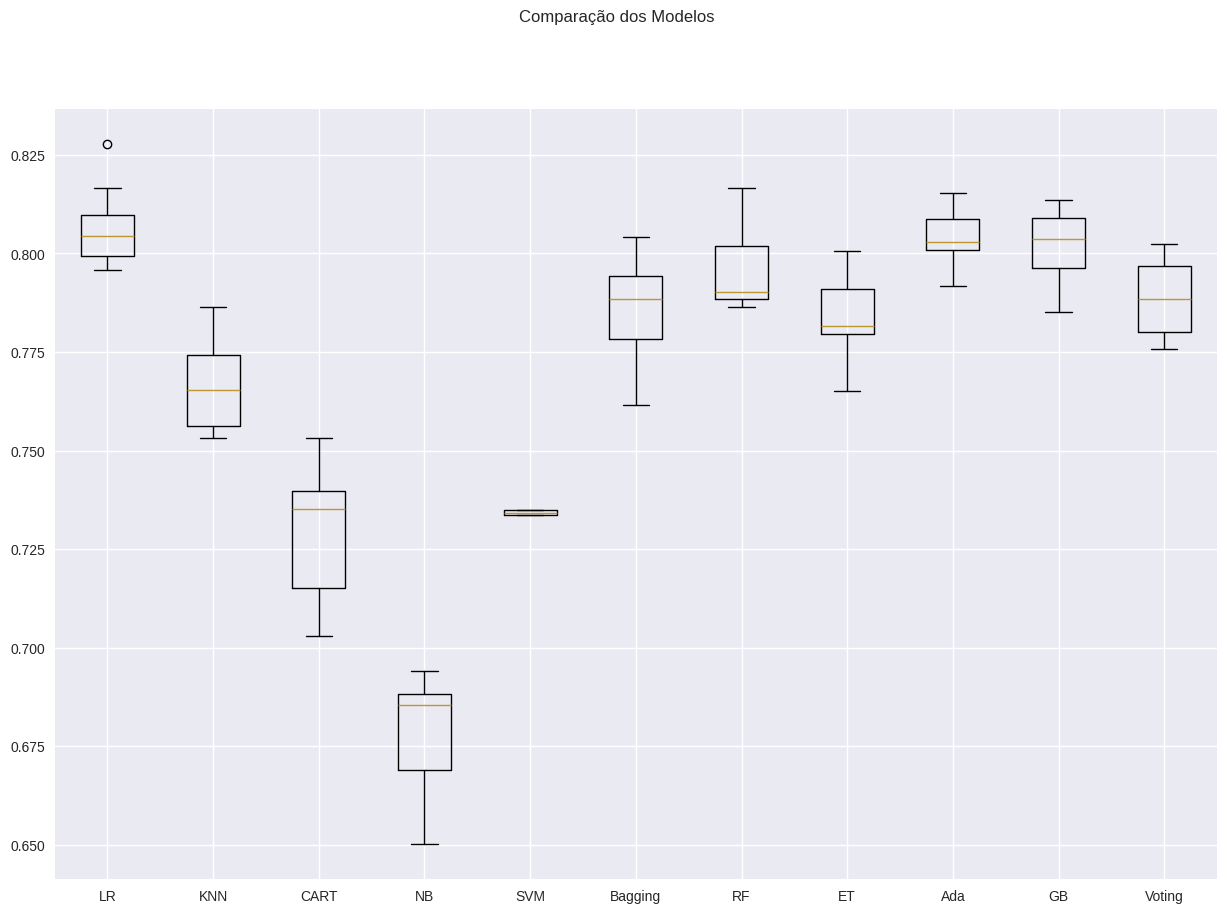

In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

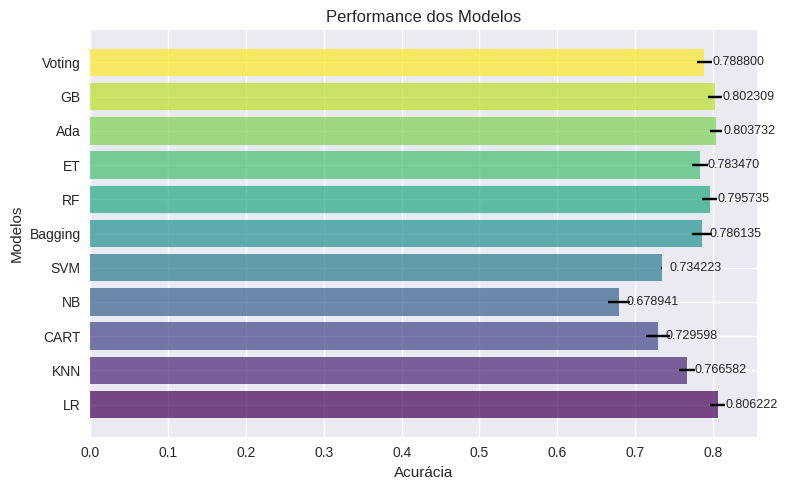

Resultados dos Modelos:
----------------------------------------
LR: 0.806222 (±0.009378)
KNN: 0.766582 (±0.010822)
CART: 0.729598 (±0.015644)
NB: 0.678941 (±0.014239)
SVM: 0.734223 (±0.000653)
Bagging: 0.786135 (±0.012669)
RF: 0.795735 (±0.009909)
ET: 0.783470 (±0.010022)
Ada: 0.803732 (±0.007762)
GB: 0.802309 (±0.008773)
Voting: 0.788800 (±0.009411)

Melhor modelo: LR
Pior modelo: NB


In [ ]:
# Gráfico de barras horizontais

# Define the variables based on the results from the previous cell
modelos = names
acuracias = [result.mean() for result in results]
desvios = [result.std() for result in results]

plt.figure(figsize=(8, 5))
bars = plt.barh(modelos, acuracias, xerr=desvios, capsize=5, alpha=0.7,
                color=plt.cm.viridis(np.linspace(0, 1, len(modelos))))

plt.xlabel('Acurácia')
plt.ylabel('Modelos')
plt.title('Performance dos Modelos')

# Adicionar valores
for i, v in enumerate(acuracias):
    plt.text(v + 0.01, i, f'{v:.6f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print dos resultados
print("Resultados dos Modelos:")
print("-" * 40)
for i, modelo in enumerate(modelos):
    print(f"{modelo}: {acuracias[i]:.6f} (±{desvios[i]:.6f})")

print(f"\nMelhor modelo: {modelos[acuracias.index(max(acuracias))]}")
print(f"Pior modelo: {modelos[acuracias.index(min(acuracias))]}")

##criação e avaliação dos modelos : dados padronizados e normalizados (Pipeline)

In [ ]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

In [ ]:
# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

In [ ]:
# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))


In [ ]:
# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

In [ ]:
# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

In [ ]:
# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

LR-orig: 0.806 (0.009)
KNN-orig: 0.767 (0.011)
CART-orig: 0.730 (0.016)
NB-orig: 0.679 (0.014)
SVM-orig: 0.734 (0.001)
Bag-orig: 0.786 (0.013)
RF-orig: 0.796 (0.010)
ET-orig: 0.783 (0.010)
Ada-orig: 0.804 (0.008)
GB-orig: 0.802 (0.009)
Vot-orig: 0.789 (0.009)
LR-padr: 0.807 (0.011)
KNN-padr: 0.760 (0.015)
CART-padr: 0.731 (0.012)
NB-padr: 0.679 (0.015)
SVM-padr: 0.800 (0.012)
Bag-padr: 0.789 (0.009)
RF-padr: 0.794 (0.011)
ET-padr: 0.786 (0.013)
Ada-padr: 0.804 (0.008)
GB-padr: 0.802 (0.009)
Vot-padr: 0.805 (0.014)
LR-norm: 0.807 (0.011)
KNN-norm: 0.757 (0.017)
CART-norm: 0.732 (0.014)
NB-norm: 0.679 (0.015)
SVM-norm: 0.800 (0.013)
Bag-norm: 0.784 (0.008)
RF-norm: 0.792 (0.012)
ET-norm: 0.781 (0.011)
Ada-norm: 0.804 (0.008)
GB-norm: 0.802 (0.009)
Vot-norm: 0.802 (0.012)


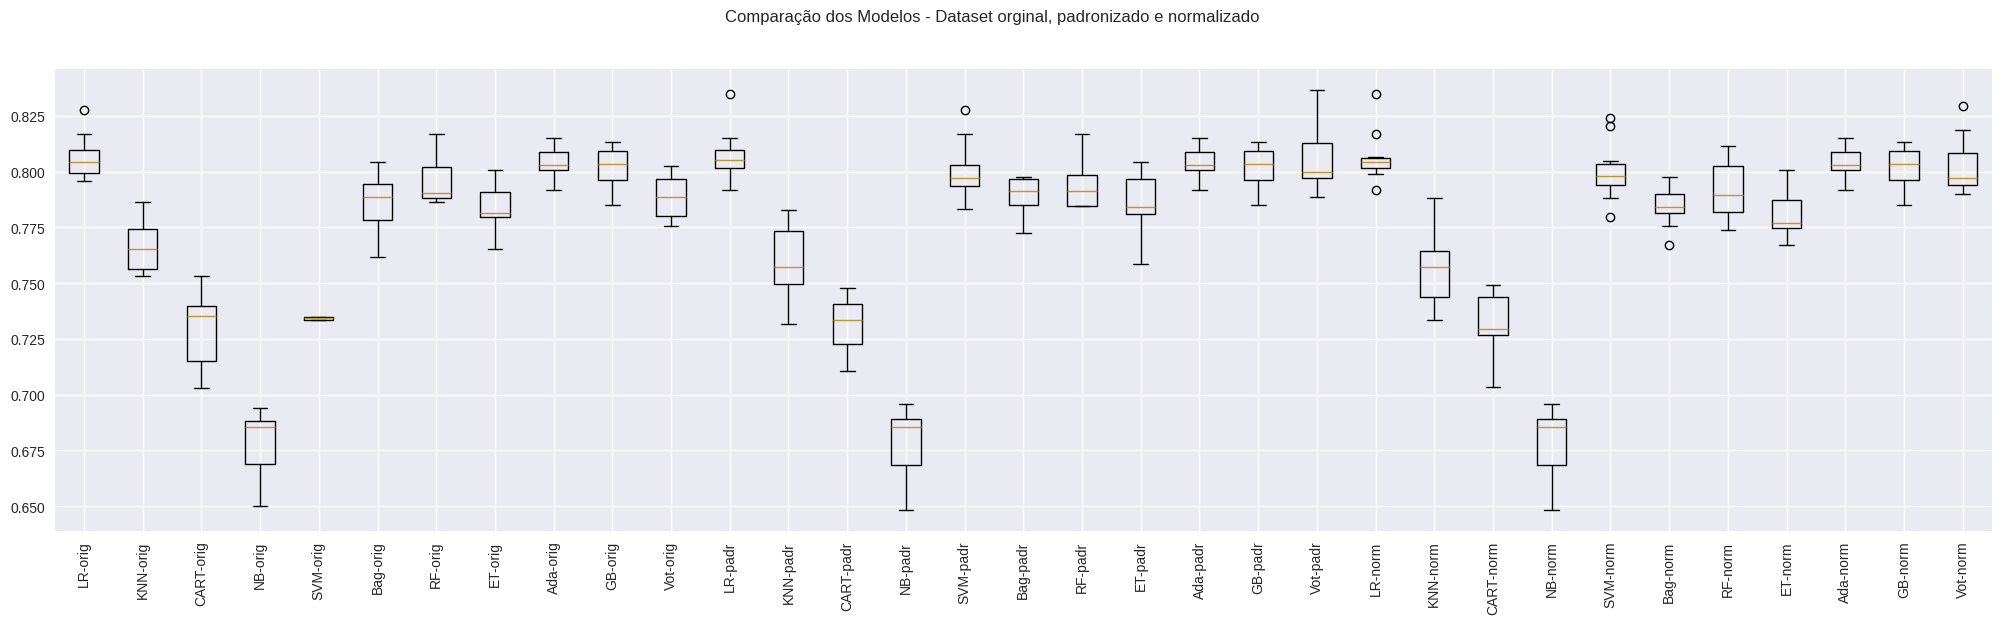

In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

##otimização de hiperparametros

In [ ]:
# Tuning do KNN

np.random.seed(9) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

In [ ]:
pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}


In [ ]:
# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.785956 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-padr - Melhor: 0.793070 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Sem tratamento de missings: knn-norm - Melhor: 0.791468 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 21}


###Finalização do modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.7981520966595593


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X_numeric_and_encoded) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X_numeric_and_encoded) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

LogisticRegression(max_iter=200)

#incluir neste mvp
Modelagem e treinamento:

Objetivo: construir modelos para resolver o problema em questão.

•	Selecione os algoritmos mais indicados para o problema e dataset escolhidos, justificando as suas escolhas.

•	Há algum ajuste inicial para os hiperparâmetros?

•	O modelo foi devidamente treinado? Foi observado problema de underfitting?

•	É possível otimizar os hiperparâmetros de algum dos modelos? Se sim, faça-o, justificando todas as escolhas.

•	Há algum método avançado ou mais complexo que possa ser avaliado?

•	Posso criar um comitê de modelos diferentes para o problema (ensembles)?


Avaliação de Resultados:

Objetivo: analisar o desempenho dos modelos gerados em dados não vistos (com a base de teste)

•	Selecione as métricas de avaliação condizentes com o problema, justificando.

•	Treine o modelo escolhido com toda a base de treino, e teste-o com a base de teste.

•	Os resultados fazem sentido?

•	Foi observado algum problema de overfitting?

•	Compare os resultados de diferentes modelos.

•	Descreva a melhor solução encontrada, justificando.


Calculando as estátisticas separadamente

#6 Conclusão
    descrever